In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import torch
import keras
from sklearn import datasets


Using TensorFlow backend.


# Data

In [2]:
df = pd.read_csv("Data/data.csv")
column_names = list(df.columns)

df.drop(["num", "Total"], axis=1, inplace=True)

target = "Legendary"
X = df.drop(target, axis=1).copy()
y = df[target].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Keras

In [3]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.utils import plot_model

Using TensorFlow backend.


## Functional API

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, activation="relu", input_shape = (X_train.shape[1],)))

## Layers API

In [14]:
def NN(input_shape):
    
    X_input = keras.layers.Input(shape=(input_shape[1],))

    X = keras.layers.Dense(50, activation='relu', name='fc1')(X_input)
    
    X = keras.layers.Dense(30, activation='relu', name='fc2')(X)
    
    X = keras.layers.Dense(1, activation="sigmoid", name="fc3")(X)

    model = keras.models.Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

In [15]:
y = df["Legendary"]
X = df[["HP", "Attack", "Speed"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify = y)

In [22]:
model = NN(X_train.shape)
print(model.summary())
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=50, batch_size=16,verbose=1, validation_split = 0.2)
print(model.evaluate(X_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
fc1 (Dense)                  (None, 50)                200       
_________________________________________________________________
fc2 (Dense)                  (None, 30)                1530      
_________________________________________________________________
fc3 (Dense)                  (None, 1)                 31        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
None
Train on 480 samples, validate on 120 samples
Epoch 1/50
480/480 [==============================] - 1s 1ms/step - loss: 0.5871 - acc: 0.8708 - val_loss: 0.2276 - val_acc: 0.9500
Epoch 2/50
480/480 [==============================] - 0s 97us/step - loss: 0.3703 - acc: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.optimizers import Adam

def create_model(learning_rate, activation):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(lr = learning_rate)
  	
  	# Create your binary classification model  
  	model = Sequential()
  	model.add(Dense(10, input_shape = (len(X_train.columns),), activation = activation))
  	model.add(Dense(8, activation = activation))
  	model.add(Dense(1, activation = 'sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ['accuracy'])
  	return model


from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn = create_model)

params = {'activation': ['relu', 'tanh'], 'batch_size': [1, 8, 32], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

random_search.fit(X_train, y_train)

# TensorFlow

In [3]:
import tensorflow as tf

## basic operations

In [3]:
a1 = tf.Variable([1,2,3], dtype=tf.float32)
print(a1)
a2 = tf.zeros([2,2])
a3 = tf.ones([3,2])
a4 = tf.zeros_like(a3)
c = tf.constant([2], dtype=tf.float32)
a1*c

<tf.Variable 'Variable:0' shape=(3,) dtype=float32_ref>


<tf.Tensor 'mul:0' shape=(3,) dtype=float32>

In [4]:
tf.add(a2,a2)
tf.multiply(a1,c)
tf.matmul(a3, a2)
tf.reduce_sum(a3,0)

<tf.Tensor 'Sum:0' shape=(2,) dtype=float32>

In [5]:
tf.reshape(a3, (6,1))

<tf.Tensor 'Reshape:0' shape=(6, 1) dtype=float32>

In [6]:
def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = tf.Variable(x0)
	with tf.GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
		y = tf.multiply(x,x)
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

SystemError: <built-in function TFE_Py_TapeSetWatch> returned a result with an error set

In [79]:
tf.reset_default_graph()
x = tf.get_variable("x", shape=(), dtype=tf.float32, trainable=True) #trainable by default
f=x**2

optmizer = tf.train.GradientDescentOptimizer(0.1)
step = optmizer.minimize(f, var_list=[x])

In [80]:
tf.trainable_variables()

[<tf.Variable 'x:0' shape=() dtype=float32_ref>]

In [81]:
s = tf.InteractiveSession() # to be able to compute

s.run(tf.global_variables_initializer()) # to initialize the variables in our graph

for i in range(10):
    _, curr_x, curr_f = s.run([step, x, f])
    print(curr_x, curr_f)
    

0.74164593 0.8594354
0.59331673 0.5500387
0.4746534 0.35202473
0.3797227 0.22529584
0.30377817 0.14418934
0.24302253 0.09228118
0.19441803 0.05905995
0.15553442 0.03779837
0.124427535 0.024190955
0.09954203 0.0154822115


In [82]:
N = 1000
D = 3
x = np.random.random((N,D))
w = np.random.random((D,1))
y = x @ w + np.random.randn(N, 1) * 0.20

tf.reset_default_graph()
features = tf.placeholder(tf.float32, shape=(None,D))
target = tf.placeholder(tf.float32, shape=(None,1))

weights = tf.get_variable("w", shape=(D,1), dtype=tf.float32)
predictions = features @ weights

loss = tf.reduce_mean((target - predictions) **2)

optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(loss)

s = tf.InteractiveSession()
saver = tf.train.Saver(tf.trainable_variables())
s.run(tf.global_variables_initializer())

for i in range(3000):
    _, curr_loss, curr_w = s.run([step, loss, weights], feed_dict = {features:x, target:y})
    if i%500==0:
#         saver.save(s, "tf_logs/2/model.ckpt", global_step = i)
        print(curr_loss)
s.close()
# saver.restore(s, "tf_logs/2/model.ckpt-50")

/work/jupyterhub/id860112/envs/py37/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0.091548406
0.038874257
0.038874254
0.038874254
0.038874254
0.038874254


## First model

### Linear regression

In [13]:
df_np = np.array(df)

target = np.array(df['Attack'], np.float32)
feature = np.array(df["Defense"], np.float32)

legendary = tf.cast(df['Legendary'], tf.bool)

In [33]:
intercept = tf.Variable(1.0, tf.float32)
slope = tf.Variable(1.0, tf.float32)

def linear_regression(intercept, slope, feature):
  	return intercept + slope * feature


def loss_function(intercept, slope, feature, target):
    
	predictions = linear_regression(intercept, slope, feature)

	return tf.keras.losses.mse(target, predictions)

opt = tf.keras.optimizers.Adam(0.5)

for i in range(100):
    opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])
    if i % 10 == 0:
        print(loss_function(intercept, slope))
    
print(loss_function(intercept, slope, feature, target))

AttributeError: 'Adam' object has no attribute 'minimize'

In [ ]:
# # Load data in batches
# for batch in pd.read_csv('Data/data.csv', chunksize=100):
# 	feature_batch = np.array(batch['Total'], np.float32)

# 	# Extract the price values for the current batch
# 	target_batch = np.array(batch['Legendary'], np.float32)

# 	# Complete the loss, fill in the variable list, and minimize
# 	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# # Print trained parameters
# print(intercept.numpy(), slope.numpy())

## Neural network

### Low level API

In [4]:
# low level approach 
borrower_features = np.array([[ 2.,  1., 24.]], np.float32)
bias1 = tf.Variable(1.0)
weights1 = tf.Variable(tf.ones((3, 5)))
product1 = tf.matmul(borrower_features, weights1)
dense1 = tf.keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = tf.Variable(1.0)
weights2 = tf.Variable(tf.ones((5, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = tf.matmul(dense1, weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
# print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print(prediction.eval())
print('\n actual: 1')


ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

### Keras API

In [5]:
inputs = tf.constant([[1,35]], dtype=tf.float32)

# high level approach
dense1 = tf.keras.layers.Dense(10, activation="relu")(inputs)
dense2 = tf.keras.layers.Dense(5, activation="relu")(dense1)
output = tf.keras.layers.Dense(1, activation="sigmoid")(dense2)

In [6]:
# Import the keras module from tensorflow
from tensorflow import keras

# Compute the mean absolute error (mae)
loss = keras.losses.mae(price, predictions)

# Print the mean absolute error (mae)
print(loss.numpy())

NameError: name 'price' is not defined

### Estimator API

In [35]:
# Define feature columns for bedrooms and bathrooms
Attack = tf.feature_column.numeric_column("Attack")
Speed = tf.feature_column.numeric_column("Speed")

# Define the list of feature columns
feature_list = [Attack, Speed]

def input_fn():
	# Define the labels
	labels = y_train.values
	# Define the features
	features = {'Attack':X_train['Attack'], 
                'Speed':X_train["Speed"]}
	return features, labels

model = tf.estimator.DNNRegressor(feature_columns=feature_list, hidden_units=[2,2])
model.train(input_fn, steps=1)
model.evaluate(X_test)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp68kk_678', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8e3467a9e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp68kk_678/model.ckpt.
INFO:ten

TypeError: unsupported callable

# PyTorch

## Linear regression example

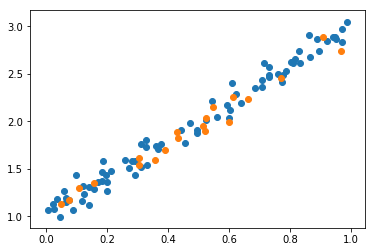

In [5]:
# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

plt.scatter(x_train, y_train)
plt.scatter(x_val, y_val)

### Numpy way

In [8]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(a, b)

# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]
[1.02354075] [1.96896447]


### PyTorch way

In [10]:
import torch
import torch.optim as optim
import torch.nn as nn
# from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


In [11]:
print(x_train_tensor.cpu().type()) # to convert to cpu

torch.FloatTensor


Create tensors from scratch

In [17]:
torch.manual_seed(42)

# # FIRST
# # Initializes parameters "a" and "b" randomly, ALMOST as we did in Numpy
# # since we want to apply gradient descent on these parameters, we need
# # to set REQUIRES_GRAD = TRUE
# a = torch.randn(1, requires_grad=True, dtype=torch.float)
# b = torch.randn(1, requires_grad=True, dtype=torch.float)
# print(a, b)

# # SECOND
# # But what if we want to run it on a GPU? We could just send them to device, right?
# a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
# b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
# print(a, b)
# # Sorry, but NO! The to(device) "shadows" the gradient...

# # THIRD
# # We can either create regular tensors and send them to the device (as we did with our data)
# a = torch.randn(1, dtype=torch.float).to(device)
# b = torch.randn(1, dtype=torch.float).to(device)
# # and THEN set them as requiring gradients...
# a.requires_grad_() #In PyTorch, every method that ends with an underscore (_) makes changes in-place, meaning, they will modify the underlying variable.
# b.requires_grad_()
# print(a, b)

# We can specify the device at the moment of creation - RECOMMENDED!
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([ 0.6226], device='cuda:0') tensor([ 1.4505], device='cuda:0')


manual training

In [18]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    # No more manual computation of gradients! 
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    # Let's check the computed gradients...
    print(a.grad)
    print(b.grad)
    
    # What about UPDATING the parameters? Not so fast...
    
    # FIRST ATTEMPT
    # AttributeError: 'NoneType' object has no attribute 'zero_' this is because by reassigning we lose the gradient info
    # a = a - lr * a.grad
    # b = b - lr * b.grad
    # print(a)

    # SECOND ATTEMPT
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # a -= lr * a.grad
    # b -= lr * b.grad        
    
    # THIRD ATTEMPT
    # We need to use NO_GRAD to keep the update out of the gradient computation
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad(): # perform regular Python operations on tensors, independent of PyTorch’s computation graph
        a -= lr * a.grad
        b -= lr * b.grad
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)

tensor([-1.2918], device='cuda:0')
tensor([-0.7076], device='cuda:0')
tensor([-0.9666], device='cuda:0')
tensor([-0.5406], device='cuda:0')
tensor([-0.7222], device='cuda:0')
tensor([-0.4150], device='cuda:0')
tensor([-0.5385], device='cuda:0')
tensor([-0.3205], device='cuda:0')
tensor([-0.4005], device='cuda:0')
tensor([-0.2493], device='cuda:0')
tensor([-0.2969], device='cuda:0')
tensor([-0.1956], device='cuda:0')
tensor([-0.2190], device='cuda:0')
tensor([-0.1552], device='cuda:0')
tensor([-0.1606], device='cuda:0')
tensor([-0.1246], device='cuda:0')
tensor([-0.1167], device='cuda:0')
tensor([-0.1016], device='cuda:0')
tensor(1.00000e-02 *
       [-8.3734], device='cuda:0')
tensor(1.00000e-02 *
       [-8.4104], device='cuda:0')
tensor(1.00000e-02 *
       [-5.9040], device='cuda:0')
tensor(1.00000e-02 *
       [-7.0859], device='cuda:0')
tensor(1.00000e-02 *
       [-4.0537], device='cuda:0')
tensor(1.00000e-02 *
       [-6.0788], device='cuda:0')
tensor(1.00000e-02 *
       [-2.66

tensor(1.00000e-03 *
       [-2.7397], device='cuda:0')
tensor(1.00000e-03 *
       [ 1.3789], device='cuda:0')
tensor(1.00000e-03 *
       [-2.6983], device='cuda:0')
tensor(1.00000e-03 *
       [ 1.3580], device='cuda:0')
tensor(1.00000e-03 *
       [-2.6575], device='cuda:0')
tensor(1.00000e-03 *
       [ 1.3375], device='cuda:0')
tensor(1.00000e-03 *
       [-2.6174], device='cuda:0')
tensor(1.00000e-03 *
       [ 1.3174], device='cuda:0')
tensor(1.00000e-03 *
       [-2.5778], device='cuda:0')
tensor(1.00000e-03 *
       [ 1.2975], device='cuda:0')
tensor(1.00000e-03 *
       [-2.5389], device='cuda:0')
tensor(1.00000e-03 *
       [ 1.2780], device='cuda:0')
tensor(1.00000e-03 *
       [-2.5005], device='cuda:0')
tensor(1.00000e-03 *
       [ 1.2587], device='cuda:0')
tensor(1.00000e-03 *
       [-2.4627], device='cuda:0')
tensor(1.00000e-03 *
       [ 1.2397], device='cuda:0')
tensor(1.00000e-03 *
       [-2.4255], device='cuda:0')
tensor(1.00000e-03 *
       [ 1.2209], device='c

tensor(1.00000e-04 *
       [ 1.1015], device='cuda:0')
tensor(1.00000e-04 *
       [-2.1565], device='cuda:0')
tensor(1.00000e-04 *
       [ 1.0862], device='cuda:0')
tensor(1.00000e-04 *
       [-2.1232], device='cuda:0')
tensor(1.00000e-04 *
       [ 1.0697], device='cuda:0')
tensor(1.00000e-04 *
       [-2.0913], device='cuda:0')
tensor(1.00000e-04 *
       [ 1.0520], device='cuda:0')
tensor(1.00000e-04 *
       [-2.0606], device='cuda:0')
tensor(1.00000e-04 *
       [ 1.0374], device='cuda:0')
tensor(1.00000e-04 *
       [-2.0287], device='cuda:0')
tensor(1.00000e-04 *
       [ 1.0215], device='cuda:0')
tensor(1.00000e-04 *
       [-1.9982], device='cuda:0')
tensor(1.00000e-04 *
       [ 1.0054], device='cuda:0')
tensor(1.00000e-04 *
       [-1.9683], device='cuda:0')
tensor(1.00000e-05 *
       [ 9.9121], device='cuda:0')
tensor(1.00000e-04 *
       [-1.9380], device='cuda:0')
tensor(1.00000e-05 *
       [ 9.7691], device='cuda:0')
tensor(1.00000e-04 *
       [-1.9083], device='c

tensor(1.00000e-06 *
       [ 7.5880], device='cuda:0')
tensor(1.00000e-05 *
       [-1.4263], device='cuda:0')
tensor(1.00000e-06 *
       [ 7.5287], device='cuda:0')
tensor(1.00000e-05 *
       [-1.4020], device='cuda:0')
tensor(1.00000e-06 *
       [ 7.4316], device='cuda:0')
tensor(1.00000e-05 *
       [-1.3791], device='cuda:0')
tensor(1.00000e-06 *
       [ 7.3387], device='cuda:0')
tensor(1.00000e-05 *
       [-1.3573], device='cuda:0')
tensor(1.00000e-06 *
       [ 7.1403], device='cuda:0')
tensor(1.00000e-05 *
       [-1.3415], device='cuda:0')
tensor(1.00000e-06 *
       [ 6.9786], device='cuda:0')
tensor(1.00000e-05 *
       [-1.3246], device='cuda:0')
tensor(1.00000e-06 *
       [ 6.7842], device='cuda:0')
tensor(1.00000e-05 *
       [-1.3101], device='cuda:0')
tensor(1.00000e-06 *
       [ 6.5539], device='cuda:0')
tensor(1.00000e-05 *
       [-1.2964], device='cuda:0')
tensor(1.00000e-06 *
       [ 6.6365], device='cuda:0')
tensor(1.00000e-05 *
       [-1.2668], device='c

tensor(1.00000e-07 *
       [ 5.4680], device='cuda:0')
tensor(1.00000e-07 *
       [-9.0618], device='cuda:0')
tensor(1.00000e-07 *
       [ 6.3784], device='cuda:0')
tensor(1.00000e-07 *
       [-8.4145], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.0955], device='cuda:0')
tensor(1.00000e-07 *
       [-8.8371], device='cuda:0')
tensor(1.00000e-07 *
       [ 6.2759], device='cuda:0')
tensor(1.00000e-07 *
       [-8.0233], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.2527], device='cuda:0')
tensor(1.00000e-07 *
       [-8.2410], device='cuda:0')
tensor(1.00000e-07 *
       [ 6.2084], device='cuda:0')
tensor(1.00000e-07 *
       [-7.6625], device='cuda:0')
tensor(1.00000e-07 *
       [ 4.7823], device='cuda:0')
tensor(1.00000e-07 *
       [-8.0629], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.8417], device='cuda:0')
tensor(1.00000e-07 *
       [-7.2934], device='cuda:0')
tensor(1.00000e-07 *
       [ 7.1456], device='cuda:0')
tensor(1.00000e-07 *
       [-6.4122], device='c

tensor(1.00000e-07 *
       [-5.7288], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.4960], device='cuda:0')
tensor(1.00000e-07 *
       [-5.7288], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.4960], device='cuda:0')
tensor(1.00000e-07 *
       [-5.7288], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.4960], device='cuda:0')
tensor(1.00000e-07 *
       [-5.7288], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.4960], device='cuda:0')
tensor(1.00000e-07 *
       [-5.7288], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.4960], device='cuda:0')
tensor(1.00000e-07 *
       [-5.7288], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.4960], device='cuda:0')
tensor(1.00000e-07 *
       [-5.7288], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.4960], device='cuda:0')
tensor(1.00000e-07 *
       [-5.7288], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.4960], device='cuda:0')
tensor(1.00000e-07 *
       [-5.7288], device='cuda:0')
tensor(1.00000e-07 *
       [ 5.4960], device='c

tensor(1.00000e-07 *
       [ 5.4960], device='cuda:0')
tensor(1.00000e-07 *
       [-5.7288], device='cuda:0')
tensor([ 1.0235], device='cuda:0') tensor([ 1.9690], device='cuda:0')


Training using optimizers

In [19]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    loss.backward()    
    
    # No more manual update!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    
print(a, b)

tensor([ 0.6226], device='cuda:0') tensor([ 1.4505], device='cuda:0')
tensor([ 1.0235], device='cuda:0') tensor([ 1.9690], device='cuda:0')


Use built in losses

In [32]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss()

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    
    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(a, b)

tensor([ 0.6226], device='cuda:0') tensor([ 1.4505], device='cuda:0')


AssertionError: nn criterions don't compute the gradient w.r.t. targets - please mark these tensors as not requiring gradients

Proper way to go

In [35]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.a + self.b * x

In [37]:
torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)
# We can also inspect its parameters using its state_dict
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

# loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # set model in training mode but don't do anything
    model.train()

    # No more manual prediction!
    # yhat = a + b * x_tensor
    yhat = model(x_train_tensor)
    
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(model.state_dict())

OrderedDict([('a', tensor([ 0.3367], device='cuda:0')), ('b', tensor([ 0.1288], device='cuda:0'))])
OrderedDict([('a', tensor([ 1.0235], device='cuda:0')), ('b', tensor([ 1.9690], device='cuda:0'))])


Using Pytorch implemented linear regression

In [38]:
class LayerLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear layer with single input and single output
        self.linear = nn.Linear(1, 1)
                
    def forward(self, x):
        # Now it only takes a call to the layer to make predictions
        return self.linear(x)

In [50]:
def my_loss(y, yhat):
    
    error = y - yhat
    loss = (error ** 2).mean()
    
    return(loss)

def make_train_step(model, loss_fct, optimizer):
    # Builds function that performs a step in the train loop
    def train_step(x, y):
        # Sets model to TRAIN mode
        model.train()
        # Makes predictions
        yhat = model(x)
        # Computes loss
        loss = loss_fct(y, yhat)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the train loop
    return train_step

torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1, 1)).to(device)
# model = ManualLinearRegression().to(device)

# Creates the train_step function for our model, loss function and optimizer
train_step = make_train_step(model, my_loss, optimizer)
losses = []

# For each epoch...
for epoch in range(n_epochs):
    # Performs one train step and returns the corresponding loss
    loss = train_step(x_train_tensor, y_train_tensor)
    losses.append(loss)
    
# Checks model's parameters
print(model.state_dict())

OrderedDict([('0.weight', tensor([[ 0.7645]], device='cuda:0')), ('0.bias', tensor([ 0.8300], device='cuda:0'))])


Dataset

In [51]:
from torch.utils.data import Dataset, TensorDataset

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

# Wait, is this a CPU tensor now? Why? Where is .to(device)?
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

train_data = TensorDataset(x_train_tensor, y_train_tensor) #simpler
print(train_data[0])

(tensor([ 0.7713]), tensor([ 2.4745]))
(tensor([ 0.7713]), tensor([ 2.4745]))


In [55]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=8, shuffle=True)

In [56]:
next(iter(train_loader))

[tensor([[ 0.1987],
         [ 0.0344],
         [ 0.8872],
         [ 0.0581],
         [ 0.0651],
         [ 0.4952],
         [ 0.9395],
         [ 0.5427]]), tensor([[ 1.2654],
         [ 1.1831],
         [ 2.8708],
         [ 1.2640],
         [ 1.1559],
         [ 1.8735],
         [ 2.8890],
         [ 2.2161]])]

In [58]:
losses = []
train_step = make_train_step(model, my_loss, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        # the dataset "lives" in the CPU, so do our mini-batches
        # therefore, we need to send those mini-batches to the
        # device where the model "lives"
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
print(model.state_dict())

OrderedDict([('0.weight', tensor([[ 0.7645]], device='cuda:0')), ('0.bias', tensor([ 0.8300], device='cuda:0'))])


Adding validation

In [59]:
from torch.utils.data.dataset import random_split

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [80, 20])

train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

In [64]:
losses = []
val_losses = []
train_step = make_train_step(model, my_loss, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            
            model.eval()

            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())

print(model.state_dict())

OrderedDict([('0.weight', tensor([[ 0.7645]], device='cuda:0')), ('0.bias', tensor([ 0.8300], device='cuda:0'))])
